# Abstract:


Breast cancer represents one of the diseases that make a high number of deaths every
year. It is the most common type of all cancers and the main cause of women's deaths
worldwide. Classification and data mining methods are an effective way to classify data.
Especially in the medical field, where those methods are widely used in diagnosis and
analysis to make decisions.

**Problem Statement**

Given the details of cell nuclei taken from breast mass, predict whether or not a patient
has breast cancer using the Ensembling Techniques. Perform necessary exploratory
data analysis before building the model and evaluate the model based on performance
metrics other than model accuracy.

**Variable Description**

radius       --> Mean of distances from center to points on the perimeter

texture      --> Standard deviation of gray-scale values

perimeter    --> Observed perimeter of the lump

area         --> Observed area of lump

smoothness   --> Local variation in radius lengths

compactness  --> perimeter^2 / area - 1.0

concavity    --> Severity of concave portions of the contour

concave      --> points number of concave portions of the contour

symmetry     --> Lump symmetry

fractal      --> dimension "coastline approximation" - 1

Diagnosis    --> Whether the patient has cancer or not? ('Malignant','Benign')

# 1. Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing the Data Set

In [4]:
df=pd.read_csv("cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
# 3. Exploring DataSet

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# 4.Data PreProcessing

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Dropping Unwanted Columns

In [13]:
df=df.drop(['Unnamed: 32'],axis='columns')

In [14]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 6. Data Visulaization

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

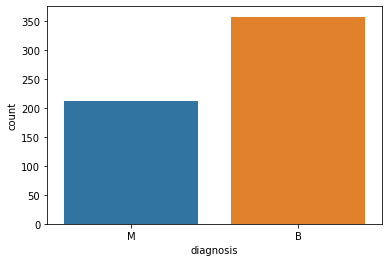

In [16]:
sns.countplot(df['diagnosis'],label="Count")     

## Data Pre-Processing

### Lable Encoding

In [19]:
df['diagnosis'] = df['diagnosis'].replace('M', 0)
df['diagnosis'] = df['diagnosis'].replace('B', 1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


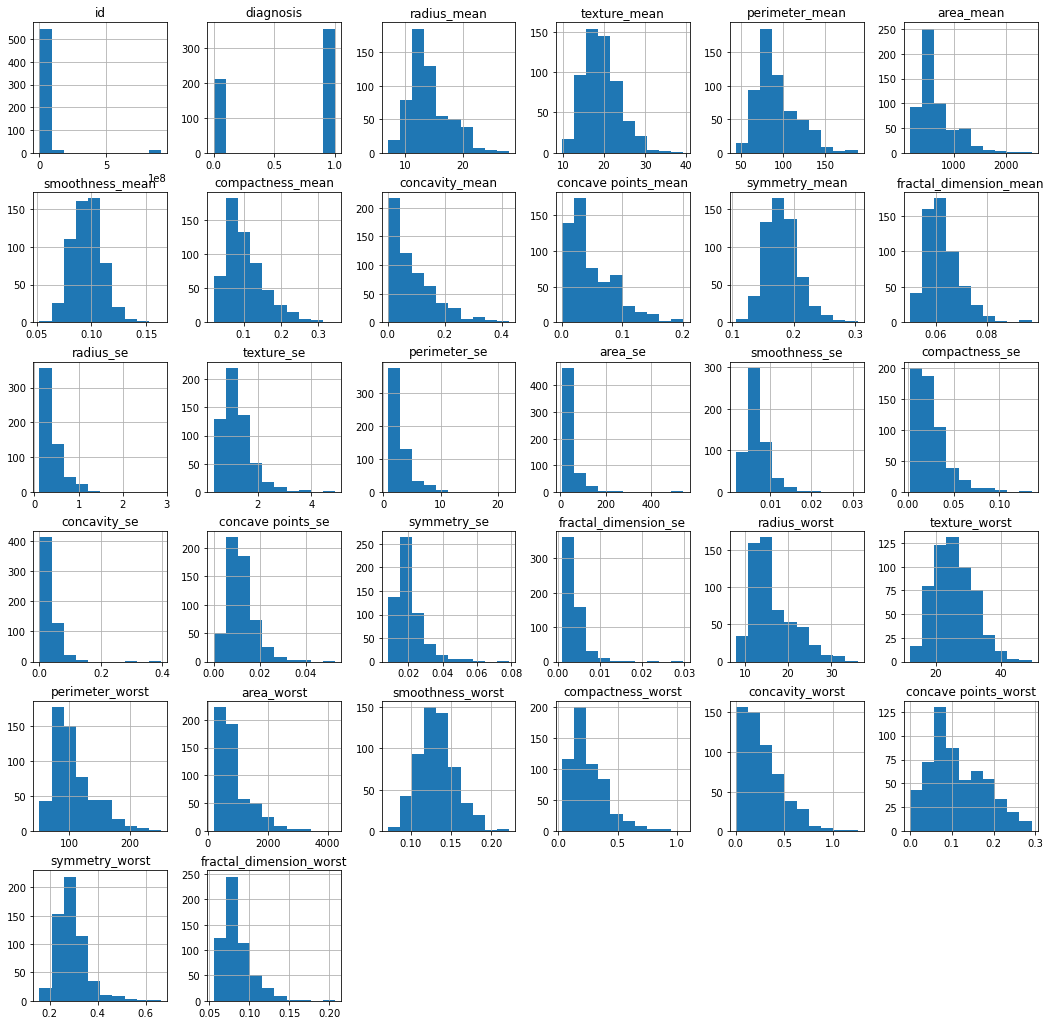

In [20]:
fig = df.hist(figsize = (18,18))

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


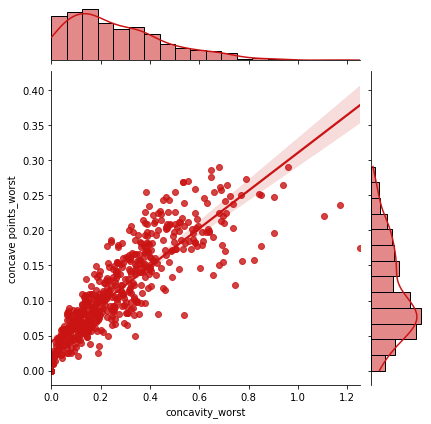

In [21]:
df1 = df.drop(['diagnosis'],axis = 1)
sns.jointplot(df.loc[:,'concavity_worst'], df.loc[:,'concave points_worst'], kind="reg", color="#ca1414")

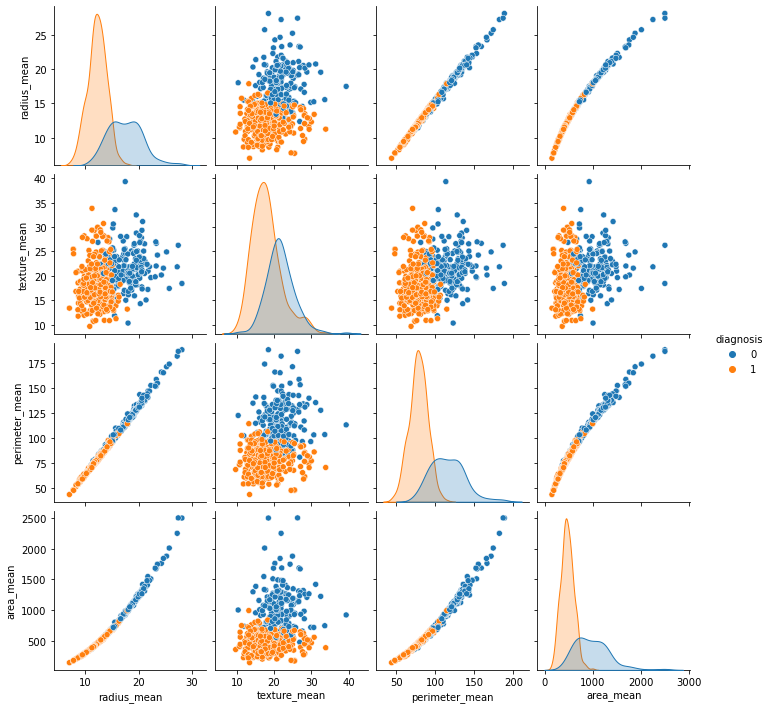

In [22]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
sns.pairplot(df[cols], hue="diagnosis")
plt.show()

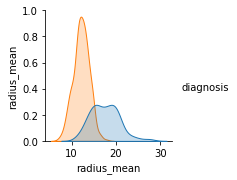

In [23]:
cols = ["diagnosis","radius_mean"]
sns.pairplot(df[cols], hue="diagnosis")
plt.show()

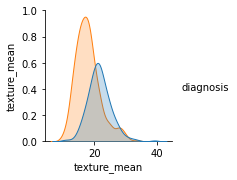

In [24]:
cols = ["diagnosis","texture_mean"]
sns.pairplot(df[cols], hue="diagnosis")
plt.show()

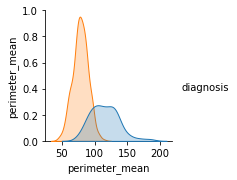

In [25]:
cols = ["diagnosis","perimeter_mean"]
sns.pairplot(df[cols], hue="diagnosis")
plt.show()

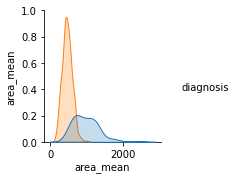

In [26]:
cols = ["diagnosis","area_mean"]
sns.pairplot(df[cols], hue="diagnosis")
plt.show()

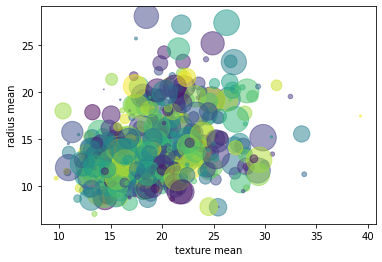

In [27]:
size = len(df['texture_mean'])
area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )
plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);

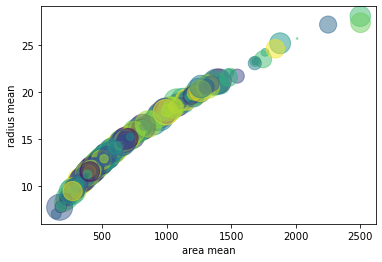

In [28]:
size = len(df['area_mean'])
area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )
plt.xlabel("area mean")
plt.ylabel("radius mean") 
plt.scatter(df['area_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);

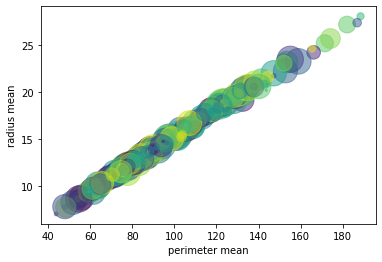

In [29]:
size = len(df['perimeter_mean'])
area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )
plt.xlabel("perimeter mean")
plt.ylabel("radius mean") 
plt.scatter(df['perimeter_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);

In [30]:
corr = df.corr()
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<AxesSubplot:>

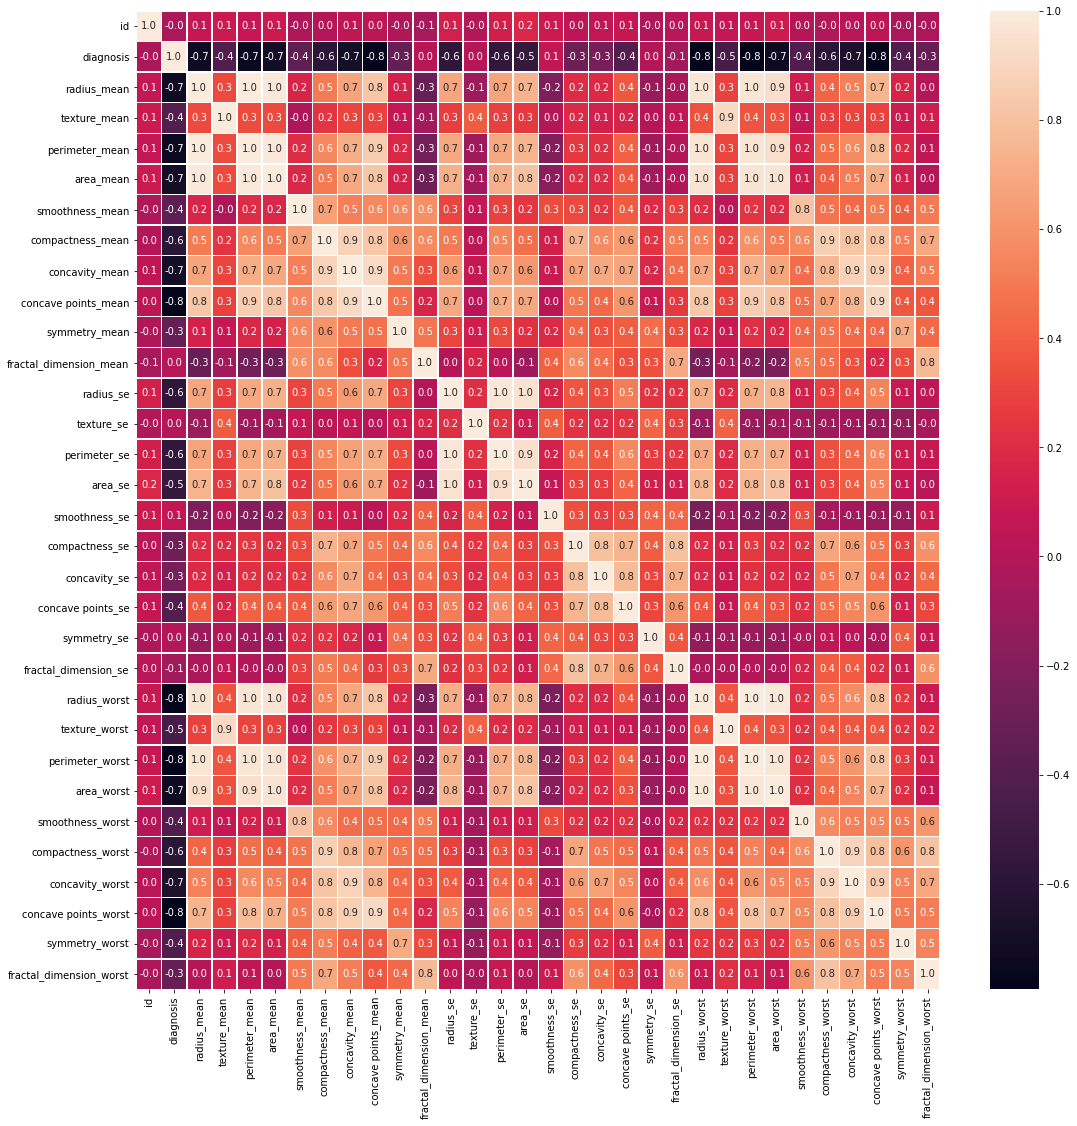

In [31]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

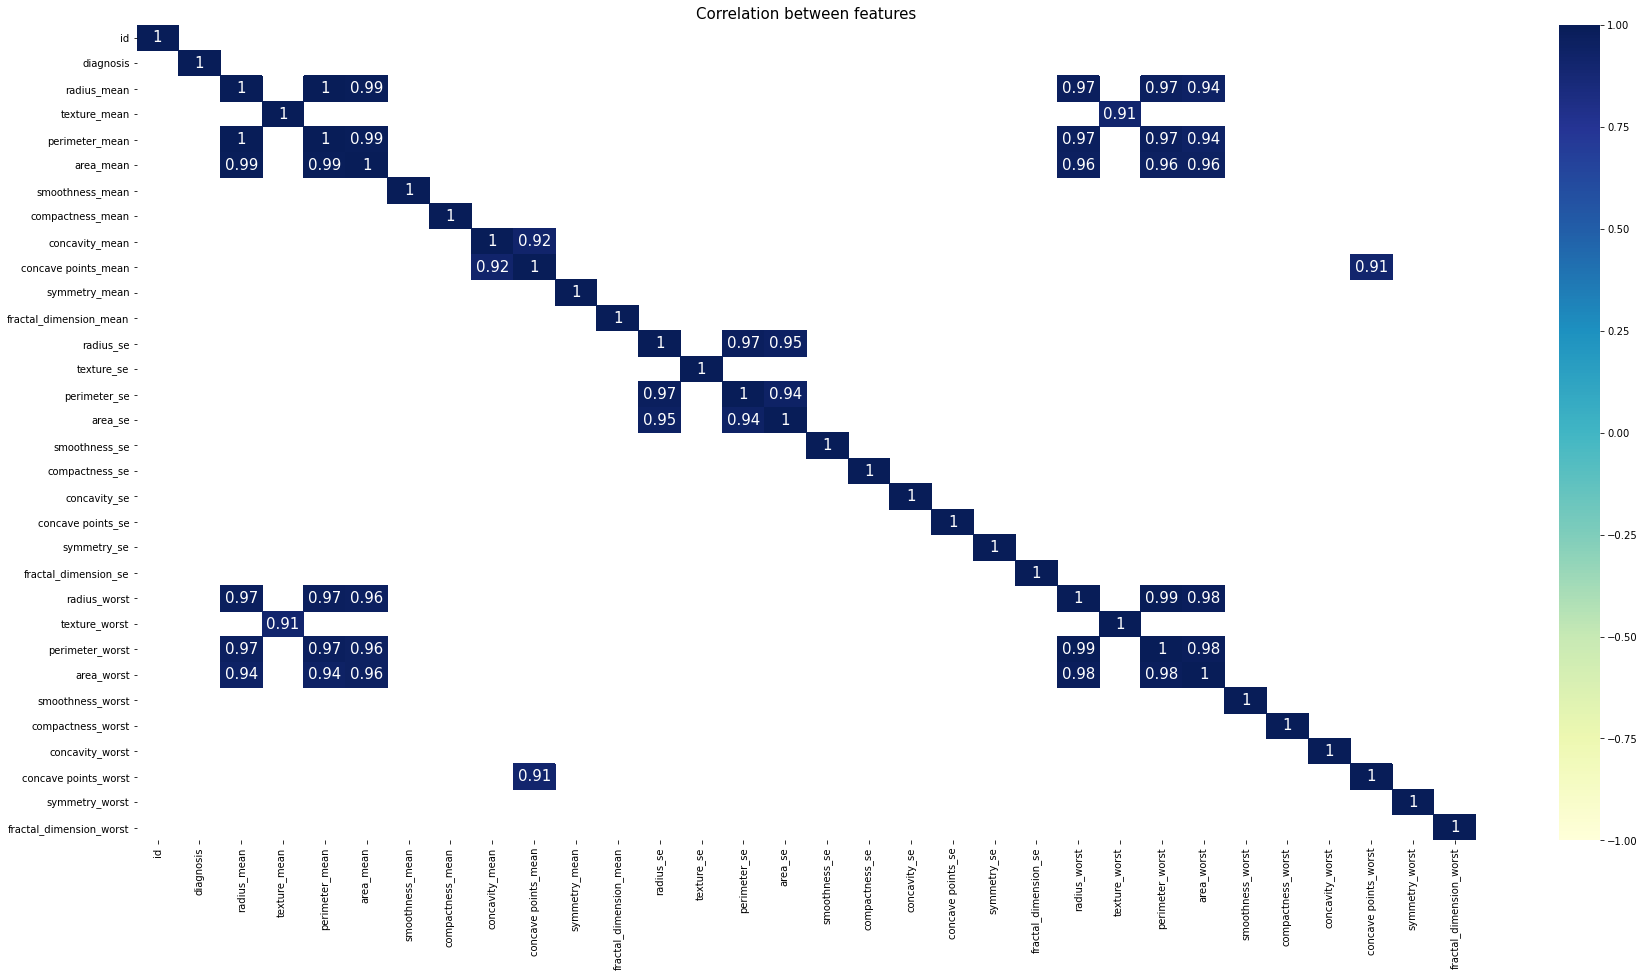

In [32]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)],cmap='YlGnBu', vmax=1.0, vmin=-1.0,annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

#### By looking at the correlation matrix we can see that variables 'perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst' have a strong positive correlation with each other. 


# These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model

In [34]:
df.drop(columns=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], inplace=True)


In [35]:
del df['id']

In [36]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [37]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [38]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


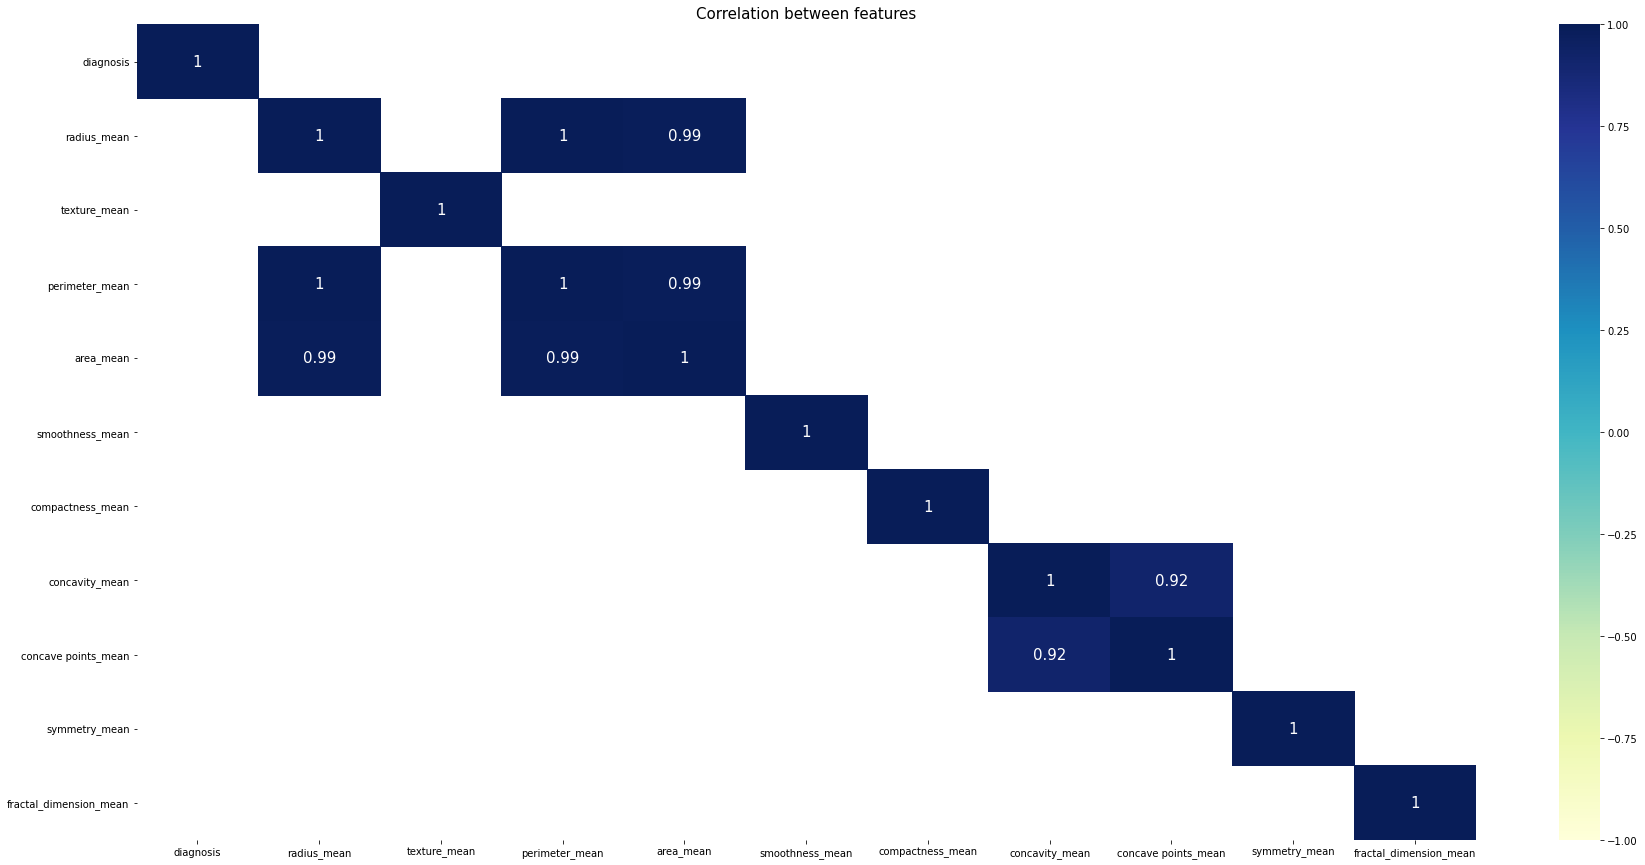

In [39]:
corr = df.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)],cmap='YlGnBu', vmax=1.0, vmin=-1.0,annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a6d3e20>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a6e3520>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a6d3ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a6e3be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a6e3f40>],
 'means': []}

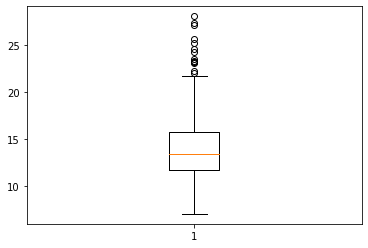

In [40]:
plt.boxplot(df['radius_mean'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a738310>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a7389d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a72afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a7440d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a744430>],
 'means': []}

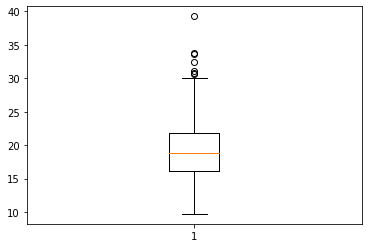

In [41]:
plt.boxplot(df['texture_mean'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a79b550>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a79bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a79b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a7a9310>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a7a9670>],
 'means': []}

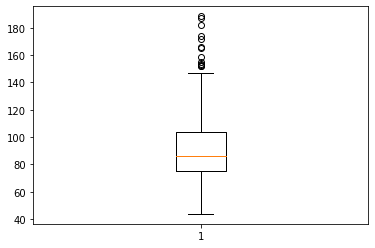

In [42]:
plt.boxplot(df['perimeter_mean'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a7e9e20>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a7f6520>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a7e9a30>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a7f6bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a7f6ee0>],
 'means': []}

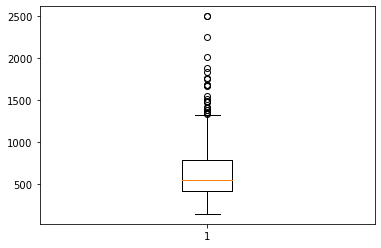

In [43]:
plt.boxplot(df['area_mean'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x28f0a849610>,
 'caps': [<matplotlib.lines.Line2D at 0x28f0a849cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28f0a849280>],
 'medians': [<matplotlib.lines.Line2D at 0x28f0a8563a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f0a8566d0>],
 'means': []}

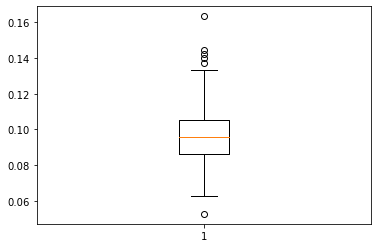

In [44]:
plt.boxplot(df['smoothness_mean'].values)

C:\Users\raghu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


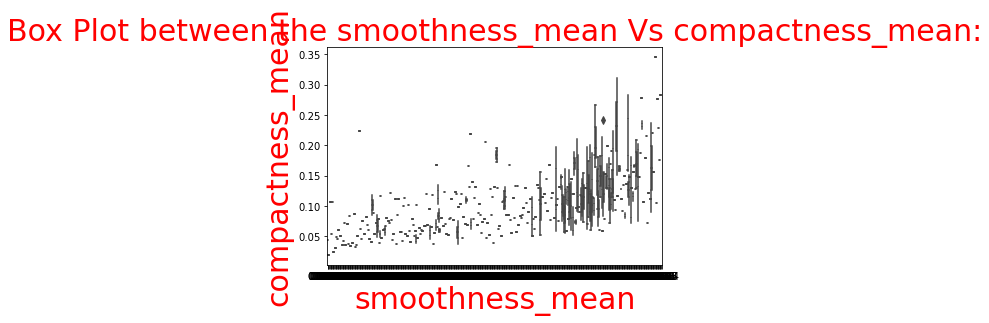

In [45]:
xdata = df['smoothness_mean']
ydata = df['compactness_mean']
sns.boxplot(xdata,ydata)
font1 = {'family':'Sans','color':'red','size':30}
plt.xlabel('smoothness_mean',fontdict = font1)
plt.ylabel('compactness_mean',fontdict = font1)
plt.title("Box Plot between the smoothness_mean Vs compactness_mean:",fontdict = font1)
plt.show()

In [46]:
## As Outliers can result in the low accuracy scores so counting the outliers

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

diagnosis                  0
radius_mean               14
texture_mean               7
perimeter_mean            13
area_mean                 25
smoothness_mean            6
compactness_mean          16
concavity_mean            18
concave points_mean       10
symmetry_mean             15
fractal_dimension_mean    15
dtype: int64

In [49]:
df = df.drop_duplicates()

## Splitting the Data Set Into x and Y

In [51]:
#Assigning features and target
x = df.loc[:,df.columns[1:]]
y = df['diagnosis']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

In [53]:
# 1. Split the dataset set
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=4)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (398, 10)
X_test  (171, 10)
y_train  (398,)
y_test  (171,)


# Lets Remove the Outliers so that we can get good accuracy

In [55]:

def capping(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)
        
        df[col]=np.where(df[col]> Up,Up,np.where(df[col]<Low,Low,df[col]))
    
    


In [56]:
cols=x_train.columns
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [57]:
capping(x_train,cols)

In [58]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
212,22.69875,18.47,152.04875,1362.6875,0.114200,0.151600,0.287705,0.154696,0.164800,0.05525
129,19.79000,25.12,130.40000,1192.0000,0.101500,0.158900,0.254500,0.114900,0.220200,0.06113
13,15.85000,23.95,103.70000,782.7000,0.084010,0.100200,0.099380,0.053640,0.184700,0.05338
307,9.00000,14.40,56.36000,246.3000,0.070050,0.031160,0.003681,0.003472,0.178800,0.06833
338,10.05000,17.53,64.41000,310.8000,0.100700,0.073260,0.025110,0.017750,0.189000,0.06331
...,...,...,...,...,...,...,...,...,...,...
456,11.63000,29.29,74.87000,415.1000,0.093570,0.085740,0.071600,0.020170,0.179900,0.06166
360,12.54000,18.07,79.42000,491.9000,0.074360,0.026500,0.001194,0.005449,0.152800,0.05185
439,14.02000,15.66,89.59000,606.5000,0.079660,0.055810,0.020870,0.026520,0.158900,0.05586
174,10.66000,15.15,67.49000,349.6000,0.087920,0.043020,0.000000,0.000000,0.192800,0.05975


In [59]:
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.155813,19.240977,92.129328,649.392274,0.096307,0.102543,0.087127,0.049014,0.181081,0.062533
std,3.391374,4.197542,23.387033,311.906064,0.012888,0.049742,0.075478,0.038309,0.026098,0.006531
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960
25%,11.742500,16.152500,75.467500,424.375000,0.086735,0.063128,0.028280,0.020103,0.161825,0.057717
50%,13.415000,18.810000,86.890000,553.750000,0.095930,0.091370,0.060070,0.033770,0.179600,0.061315
75%,16.125000,21.660000,106.100000,799.700000,0.104575,0.130575,0.132050,0.073940,0.196600,0.066128
max,22.698750,29.921250,152.048750,1362.687500,0.131335,0.231746,0.287705,0.154696,0.248762,0.078743


# Just Checking wheather the outliers are removed or Not

In [61]:
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1
((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR))).sum() 

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

## Importing SVM and Other Metrics fro sklearn

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, precision_score

# Feature Scaling

In [86]:
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# SVM Model Building and  Fitting the SVM training data

In [87]:
model = SVC(kernel='linear', gamma='scale')
model.fit(x_train, y_train) 

SVC(kernel='linear')

In [88]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

##  Building the Confusion Matrix and Classification Report

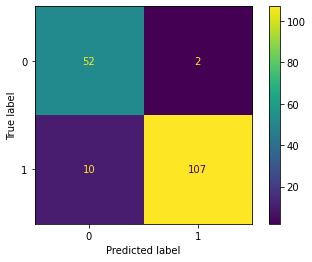

In [89]:
confusionmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=model.classes_).plot()

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 52   2]
 [ 10 107]]
The model accuracy is 0.9298245614035088


In [91]:
X_train_prediction = model.predict(x_train)
training_data_accuracy = metrics.accuracy_score(y_train,X_train_prediction)

In [92]:
print('Accuracy of training data = ',training_data_accuracy)

Accuracy of training data =  0.9472361809045227


In [93]:
x_test_prediction = model.predict(x_test)
testing_data_accuracy = metrics.accuracy_score(y_test,x_test_prediction)

In [94]:
print('Accuracy of testing data = ',testing_data_accuracy)

Accuracy of testing data =  0.9298245614035088


In [95]:
y_pred = model.predict(x_test)

## Precision Score, Sensitivity, Specificity, Recall, F-Score

In [96]:
print('Precision Score: {}'.format(precision_score(y_test,y_pred)));
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)


Precision Score: 0.981651376146789
Sensitivity :  0.9629629629629629
Specificity :  0.9145299145299145


In [97]:
from sklearn.metrics import classification_report
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.98      0.91      0.95       117

    accuracy                           0.93       171
   macro avg       0.91      0.94      0.92       171
weighted avg       0.94      0.93      0.93       171



## ROC Curve

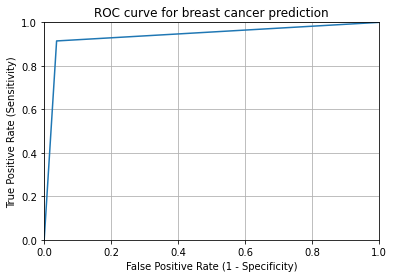

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library

Even we got very good accuracy , we have to ture the hyper parameter. But we got very good accuray without using the hyper parameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
 #refitting i to find the best parameter cobination fist with cross vvalidation and again without cross validation. 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [110]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.9, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.9, gamma=0.1)


In [111]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))



              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.97      0.95      0.96       117

    accuracy                           0.95       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



<AxesSubplot:>

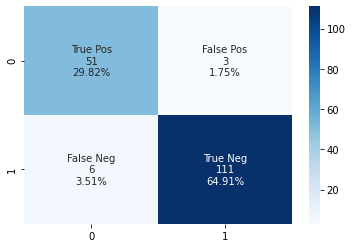

In [112]:
#this is another method to view confusion matrix, without confusing ourselves.

cm = confusion_matrix(y_test, grid_predictions)

group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [113]:
df.iloc[3]. values. tolist()

[0.0,
 11.42,
 20.38,
 77.58,
 386.1,
 0.1425,
 0.2839,
 0.2414,
 0.1052,
 0.2597,
 0.09744]

In [115]:
input_data = (20.72,
 50.56,
 55.58,
 200.2,
 0.2562,
 0.1456,
 0.3568,
 0.1235,
 0.2202,
 0.09235)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is cancer-free')
else:
  print('The person has cancer')

[0]
The person is cancer-free


## Conclusion

*If the output get [0] is Benigin the patient have no cancer

*If the output get [1] is malignant the patient have cancer

=> According to input data the output is [0] so is Benigin, the cells are not hamfull, so the patient have no cancer

We have done data cleaning, Data exploration usinf sns and matplotlib and prediction using svm kernal we have built the classification report and hypertuning